In [91]:
import pandas as pd

df = pd.read_pickle('./data/none-20190326-182522.pkl')
df.columns

Index(['Intake Date', 'Source', 'Species', 'Group', 'Size', 'Outcome',
       'Cause of Death (if applicable)', 'Housing Need'],
      dtype='object')

In [18]:
df

,Intake Date,Source,Species,Group,Size,Outcome,Cause of Death (if applicable),Housing Need
0,2019-03-05,From Field,Dog,Neonatal (less than 7 weeks),Small (under 30lbs for dogs),Adoption,Did Not Die,Co-Housing
1,2019-03-06,From Field,Dog,Neonatal (less than 7 weeks),Small (under 30lbs for dogs),Adoption,Did Not Die,Co-Housing
2,2019-03-05,Over Counter,Dog,Neonatal (less than 7 weeks),Small (under 30lbs for dogs),Adoption,Did Not Die,Co-Housing
3,2019-03-07,Over Counter,Dog,Nursing Mom,Small (under 30lbs for dogs),Adoption,Did Not Die,Co-Housing
4,2019-03-05,From Field,Dog,Puppies/Kittens (7-16 weeks - inclusive),Small (under 30lbs for dogs),Return to Owner,Did Not Die,Co-Housing
5,2019-03-08,From Field,Dog,Other Adult (over 16 weeks),Large (over 30lbs for dogs),Return to Owner,Did Not Die,Single Unit Housing
6,2019-03-08,From Field,Dog,Other Adult (over 16 weeks),Large (over 30lbs for dogs),Transfer,Did Not Die,Single Unit Housing
7,2019-03-09,Over Counter,Dog,Other Adult (over 16 weeks),Large (over 30lbs for dogs),Death,Behavior,Single Unit Housing
8,2019-03-10,From Field,Dog,Puppies/Kittens (7-16 weeks - inclusive),Large (over 30lbs for dogs),Adoption,Did Not Die,Single Unit Housing
9,2019-03-11,From Field,Dog,Puppies/Kittens (7-16 weeks - inclusive),Large (over 30lbs for dogs),Adoption,Did Not Die,Single Unit Housing


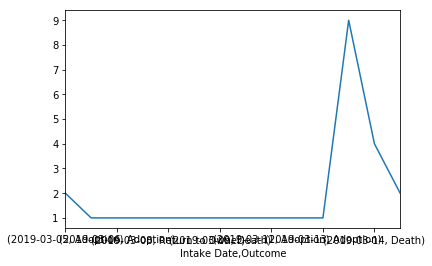

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

df.groupby('Intake Date')['Outcome'].value_counts().plot()

In [9]:
df['Outcome'].value_counts().keys()

Index(['Adoption', 'Death', 'Return to Owner', 'Transfer'], dtype='object')

In [10]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [19]:
traces = [go.Histogram(x=df[df['Outcome']==outcome]['Intake Date'], name=outcome.title()) for outcome in list(df['Outcome'].value_counts().keys())]
fig = go.Figure(data=traces, layout=go.Layout(barmode='stack'))
iplot(fig, filename='basic histogram')

In [47]:
vals = df.groupby('Species')['Group'].value_counts().sort_index()
print(vals.keys())
row_labels, col_labels = [x.tolist() for x in vals.keys().levels]
print(row_labels)
print(col_labels)
z = vals
print(z)
print(vals)

MultiIndex(levels=[['Cat', 'Dog'], ['Neonatal (less than 7 weeks)', 'Nursing Mom', 'Other Adult (over 16 weeks)', 'Puppies/Kittens (7-16 weeks - inclusive)']],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3]],
           names=['Species', 'Group'])
['Cat', 'Dog']
['Neonatal (less than 7 weeks)', 'Nursing Mom', 'Other Adult (over 16 weeks)', 'Puppies/Kittens (7-16 weeks - inclusive)']
[[ 2  1  2  2]
 [ 3  1 11  5]]
Species  Group                                   
Cat      Neonatal (less than 7 weeks)                 2
         Nursing Mom                                  1
         Other Adult (over 16 weeks)                  2
         Puppies/Kittens (7-16 weeks - inclusive)     2
Dog      Neonatal (less than 7 weeks)                 3
         Nursing Mom                                  1
         Other Adult (over 16 weeks)                 11
         Puppies/Kittens (7-16 weeks - inclusive)     5
Name: Group, dtype: int64


In [65]:
from plotly import tools
vals = df.groupby('Species')['Group'].value_counts().sort_index()
row_labels, col_labels = [x.tolist() for x in vals.keys().levels]
z = vals.values.reshape(2, 4)
heatmap = go.Heatmap(z=z, x=col_labels, y=row_labels, colorscale='Viridis')
hist = go.Histogram(x=df[df['Species'] == 'Dog']['Size'])
fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Adult Dog Sizes', 'Population Totals'))
fig.append_trace(hist, 1, 1)
fig.append_trace(heatmap, 1, 2)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [74]:
df['Intake Date'].unique()

array(['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
       '2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12',
       '2019-03-13', '2019-03-14'], dtype=object)

In [79]:
from plotly import tools

#print(vals.keys().levels)

#row_labels, col_labels = [x.tolist() for x in vals.keys().levels]
#z = vals.values.reshape(2, 4)
#heatmap = go.Heatmap(z=z, x=col_labels, y=row_labels, colorscale='Viridis')
print(len(vals))
print(vals.values)
print(np.meshgrid(x, y, z, sparse=True))

16
[[2 2 2 2 2]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [6 6 6 6 6]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [2 2 2 2 2]]
